# Exploratory Data Analysis on Stores Data for Internship

## The objective of this analysis is to give keen insight to the profit and sales performance on all the stores

### Introduction

The quest of this Exploratory Data Analysis is to analyse the performance of retail stores using a dataset containing various metrics related to **store operations, sales, and customer behaviour**. The dataset provides insights into **store characteristics, sales figures, customer demographics, and other key performance indicators (KPIs)** essential for evaluating store performance and making informed business decisions.

### Problem Statement

The dataset provided offers a comprehensive view of retail stores, including attributes, sales data, and customer metrics. However, without proper analysis, this data remains untapped. The objective is to extract actionable insights to enhance store performance, sales strategies, and customer engagement. **By segmenting stores, analysing sales trends, and assessing online presence, retailers can make informed decisions. Understanding customer behaviour and profitability metrics is crucial for tailored marketing and cost optimization.** Through data-driven approaches, retailers aim to stay competitive and adapt to evolving consumer preferences. In the dynamic retail landscape, optimizing store performance and maximizing profitability are paramount.

### Objective

The primary objective of this analysis is to assess the performance of retail stores, identify factors influencing **sales and profitability, and uncover patterns or trends that can drive strategic decision-making.** By examining various **store metrics and KPIs, stakeholders can gain insights into store operations, customer behaviour, market demand, and overall business performance.**

### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab
import plotly.express as px

**Analysis**

* **NumPy (Numerical Python):** Provides support for numerical operations and array manipulations, essential for scientific computing and data analysis
* **Pandas:** Offers data structures and functions for efficient data manipulation and analysis, particularly for working with structured data such as tables or CSV files
* **Matplotlib:** A powerful plotting library for creating static, interactive, and animated visualizations, allowing users to generate a wide range of plots and charts
* **Seaborn:** Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive and informative statistical graphics, simplifying the process of visualizing complex datasets
* **Plotly:** Offers interactive and web-based plotting capabilities, allowing users to create interactive visualizations, dashboards, and data applications for sharing and collaboration
* **Pylab:** A module that provides a MATLAB-like interface for Matplotlib, making it easier for users familiar with MATLAB to transition to Python for plotting and data visualization tasks


### Read Data

In [13]:
store_data=pd.read_csv('stores.csv')
store_data.head()

StoreCode         StoreName     StoreType Location  OperatingCost  \
0    STR101  Electronics Zone  Electronincs    Delhi           21.0   
1    STR102      Apparel Zone       Apparel    Delhi           21.0   
2    STR103       Super Bazar  Super Market    Delhi           22.8   
3    STR104      Super Market  Super Market    Delhi           21.4   
4    STR105     Central Store  Super Market    Delhi           18.7   

   Staff_Cnt  TotalSales  Total_Customers  AcqCostPercust  BasketSize  \
0         60       160.0              110            3.90       2.620   
1         60       160.0              110            3.90       2.875   
2         40       108.0               93            3.85       2.320   
3         60       258.0              110            3.08       3.215   
4         80       360.0              175            3.15       3.440   

   ProfitPercust  OwnStore  OnlinePresence  Tenure  StoreSegment  
0          16.46         0               1       4             4  
1          17.02         0               1       4             4  
2          18.61         1               1       4             1  
3          19.44         1               0       3             1  
4          17.02         0               0       3             2

**Analysis:** Load data from various file formats such as CSV, Excel, SQL databases, JSON, HTML, and more into Pandas DataFrames. It is also used to view the table that is important for data analysis, cleaning, manipulation, visualization.

In [14]:
store_data.columns

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

**Analysis:** The above code is used to collect and view the information about columns in the dataset. Columns related information is important to convey in analysis, it is a part of Exploratory Data Analysis.



In [15]:
store_data.shape

(32, 15)

### Dataset Related Information

In [16]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StoreCode        32 non-null     object 
 1   StoreName        32 non-null     object 
 2   StoreType        32 non-null     object 
 3   Location         32 non-null     object 
 4   OperatingCost    32 non-null     float64
 5   Staff_Cnt        32 non-null     int64  
 6   TotalSales       32 non-null     float64
 7   Total_Customers  32 non-null     int64  
 8   AcqCostPercust   29 non-null     float64
 9   BasketSize       32 non-null     float64
 10  ProfitPercust    32 non-null     float64
 11  OwnStore         32 non-null     int64  
 12  OnlinePresence   32 non-null     int64  
 13  Tenure           32 non-null     int64  
 14  StoreSegment     32 non-null     int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 3.9+ KB


**Analysis** In the above code all column related information is there, names of the columns, data types of the column. These are required things that are really important for data analysis and for other needs.

### Statistical Information about Dataset

In [7]:
store_data.describe()

OperatingCost  Staff_Cnt  TotalSales  Total_Customers  AcqCostPercust  \
count      32.000000  32.000000   32.000000        32.000000       29.000000   
mean       20.090625  61.875000  230.721875       146.687500        3.651034   
std         6.026948  17.859216  123.938694        68.562868        0.532664   
min        10.400000  40.000000   71.100000        52.000000        2.760000   
25%        15.425000  40.000000  120.825000        96.500000        3.150000   
50%        19.200000  60.000000  196.300000       123.000000        3.730000   
75%        22.800000  80.000000  326.000000       180.000000        3.920000   
max        33.900000  80.000000  472.000000       335.000000        4.930000   

       BasketSize  ProfitPercust   OwnStore  OnlinePresence     Tenure  \
count   32.000000      32.000000  32.000000       32.000000  32.000000   
mean     3.217250      17.848750   0.437500        0.406250   3.687500   
std      0.978457       1.786943   0.504016        0.498991   0.737804   
min      1.513000      14.500000   0.000000        0.000000   3.000000   
25%      2.581250      16.892500   0.000000        0.000000   3.000000   
50%      3.325000      17.710000   0.000000        0.000000   4.000000   
75%      3.610000      18.900000   1.000000        1.000000   4.000000   
max      5.424000      22.900000   1.000000        1.000000   5.000000   

       StoreSegment  
count     32.000000  
mean       2.625000  
std        1.211504  
min        1.000000  
25%        2.000000  
50%        2.000000  
75%        4.000000  
max        4.000000

**Analysis**In the above code, all the numerical columns are present, categorical are not there as .describe() defines the statistical values of each column, and statistical values are only generated by numerical columns. There are counts of each column, means, standard deviation, min values, maximum values, along with percentile 25%, 50%, 75%. ‘describe()’ method in Pandas provides a summary statistics of the numerical columns in a DataFrame, offering insights into the central tendency, dispersion, and shape of the data distribution. It includes statistics such as count, mean, standard deviation, minimum, maximum, and quartiles, giving a comprehensive overview of the data's distribution. This method is useful for quickly understanding the overall characteristics of the dataset, identifying potential outliers or anomalies, and guiding further data exploration and analysis. It helps in making informed decisions about data preprocessing, visualization, and modeling by providing key statistical metrics at a glance.

### Null or Blank or Empty value checking

In [8]:
store_data.isnull().sum()

StoreCode          0
StoreName          0
StoreType          0
Location           0
OperatingCost      0
Staff_Cnt          0
TotalSales         0
Total_Customers    0
AcqCostPercust     3
BasketSize         0
ProfitPercust      0
OwnStore           0
OnlinePresence     0
Tenure             0
StoreSegment       0
dtype: int64

In [9]:
store_data.isnull().sum().sum() 

3

**Analysis** There are only three null values in AcqCostPercust. Other columns are null or blank value free. The null values should be changed as it is necessary to fill the blank values for the better analysis of data. ‘isnull()’ returns a DataFrame of the same shape as the original DataFrame, where each element is a boolean value indicating whether the corresponding element in the original DataFrame is missing (True) or not (False). It is often used to identify missing values in the dataset. ‘sum()’ is then used to sum the boolean values along each column axis. Since boolean values are treated as 1 for True and 0 for False when performing arithmetic operations, summing them effectively counts the number of True values in each column. Therefore, .sum() returns a Series containing the count of missing values in each columnCombining .isnull().sum() allows you to quickly calculate the number of missing values in each column of a DataFrame, providing valuable insights into the data quality and helping guide data cleaning and preprocessing steps

In [10]:
store_data['AcqCostPercust'].dtype

dtype('float64')

### Univariate Analysis using Boxplot

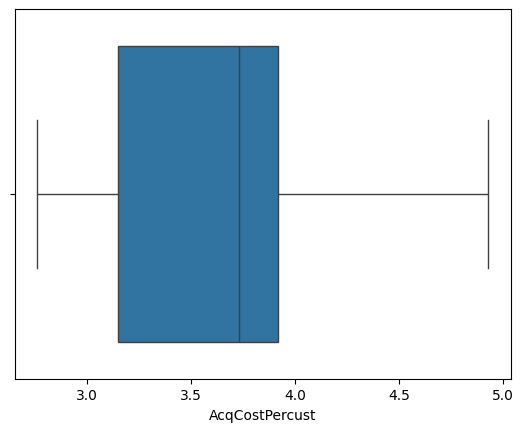

In [11]:
sns.boxplot(x='AcqCostPercust',data=store_data)
plt.show()

**Analysis** In the above figure a box plot is used to check whether there are no any outliers in the “AcqCostPercust” column or not, if there have an outlier then these null values would be replaced with median.

### Missing Value checking using Heatmap

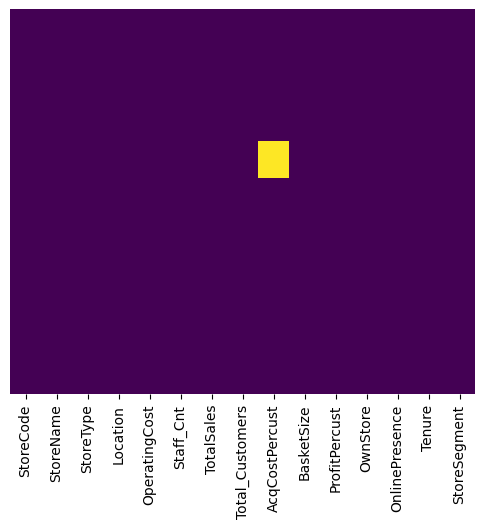

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(store_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

**Analysis** The above heatmap shows that only in the "AcqCostPercust" has three (3) null values in the yellow spot, rest of the part is in violet colour as there is no null value in the other columns 

### Missing data filling with mean

In [13]:
store_data.fillna(value=store_data['AcqCostPercust'].mean()).head()

StoreCode         StoreName     StoreType Location  OperatingCost  \
0    STR101  Electronics Zone  Electronincs    Delhi           21.0   
1    STR102      Apparel Zone       Apparel    Delhi           21.0   
2    STR103       Super Bazar  Super Market    Delhi           22.8   
3    STR104      Super Market  Super Market    Delhi           21.4   
4    STR105     Central Store  Super Market    Delhi           18.7   

   Staff_Cnt  TotalSales  Total_Customers  AcqCostPercust  BasketSize  \
0         60       160.0              110            3.90       2.620   
1         60       160.0              110            3.90       2.875   
2         40       108.0               93            3.85       2.320   
3         60       258.0              110            3.08       3.215   
4         80       360.0              175            3.15       3.440   

   ProfitPercust  OwnStore  OnlinePresence  Tenure  StoreSegment  
0          16.46         0               1       4             4  
1          17.02         0               1       4             4  
2          18.61         1               1       4             1  
3          19.44         1               0       3             1  
4          17.02         0               0       3             2

**Analysis** All the three null values are filled with mean in this column, missing values are not filled with median in this case as there is no outliers in the column where missing values are exit, this is proved by the univariate box plot analysis. The .fillna() method in Pandas is used to fill missing (NaN) values in a DataFrame or Series with a specified value or method. It allows for handling missing data by replacing NaN values with a predefined constant, such as zero, a specific value, or the result of a calculation. This helps in data preprocessing and cleaning, ensuring that missing values are appropriately addressed before further analysis or modeling. By filling missing values, it helps maintain the integrity of the dataset and avoids potential issues during data processing, visualization, or statistical analysis.

### Checking duplicate values

In [14]:
duplicate_rows = store_data.duplicated()
print(store_data[duplicate_rows])
print("Total duplicate rows:", duplicate_rows.sum())

Empty DataFrame
Columns: [StoreCode, StoreName, StoreType, Location, OperatingCost, Staff_Cnt, TotalSales, Total_Customers, AcqCostPercust, BasketSize, ProfitPercust, OwnStore, OnlinePresence, Tenure, StoreSegment]
Index: []
Total duplicate rows: 0


**Analysis:** By the above code it has been stated that there are no duplicate rows in this dataset as the Total duplicate rows: 0. Duplicate rows can change the analysis and it could some of malfunctions that is not desirable for data cleaning and manipulation as well as data analysis. The .duplicated() method in pandas is used to identify duplicate rows in a DataFrame. It returns a Boolean Series where each element indicates whether the corresponding row is a duplicate of a previous row (True) or not (False). By default, it marks the first occurrence of each duplicated row as False and subsequent occurrences as True. This method is useful for data cleaning and quality assurance, allowing users to detect and remove duplicate records to ensure data integrity and accuracy in analysis or modelling tasks.

### Univariate analysis to check the occurance and the distribution of the values

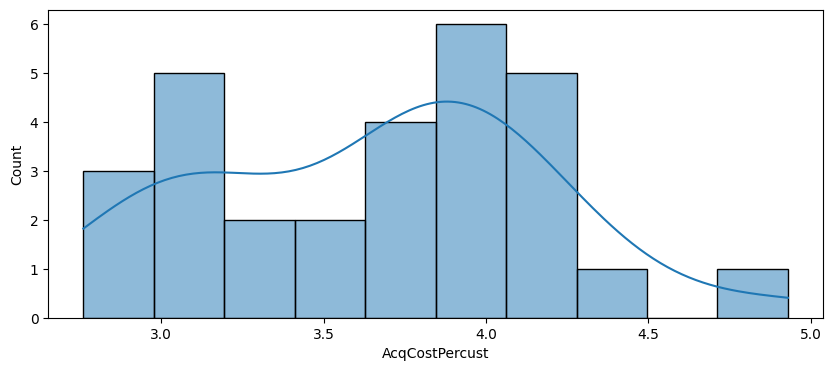

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(x='AcqCostPercust',data=store_data,bins=10, kde=True)
plt.show()

**Analysis** Histogram is used to estimate the distribution of values in ‘AcqCostPercust’ column in the dataset. KDE plot more intensive probability distribution. Any pattern of this KDE plot is not specifically found. This is not a symmetrical distribution; it seems main high count of value density is between 3.5 to 4.0.

### Univariate analysis of Total Sales to its Count and Distribution

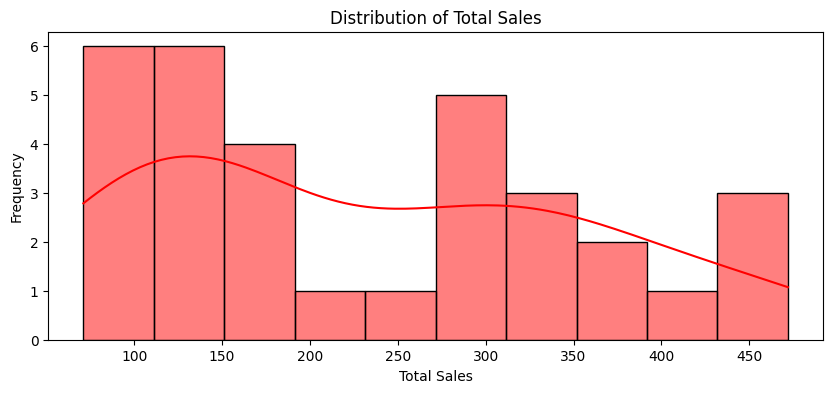

In [4]:
plt.figure(figsize=(10,4))
sns.histplot(data=store_data,x='TotalSales', bins=10, kde=True, color='red')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

**Analysis** Distribution of total sales has been checked by the histogram and KDE plot. Any pattern of this KDE plot is not specifically found. The distribution is asymmetrical total sales 100 and 150 have highest frequency count, as well as 200,250 and 400 have lowest frequency count. That means goods at rupees 100 and 150 have most sale, comparatively goods of rupees 200,250 and 400 have less sale.

### Unique value checking on Store Type

In [16]:
print("Data type of column:", store_data['StoreType'].dtype)
print("Number of unique values:", store_data['StoreType'].nunique())
print("Value counts:")
print(store_data['StoreType'].value_counts())
print("Unique values:")
print(store_data['StoreType'].unique())

Data type of column: object
Number of unique values: 3
Value counts:
StoreType
Apparel         12
Super Market    12
Electronincs     8
Name: count, dtype: int64
Unique values:
['Electronincs' 'Apparel' 'Super Market']


**Analysis** 
Checking for unique values can uncover any inconsistencies or errors in the data. In this column has three unique values, these are categorical values, these are categorised into Apparel, Super Market, Electronics. Checking for unique values can uncover any inconsistencies or errors in the data. This column contains categorical variables and Unique values can guide data preprocessing steps such as encoding categorical variables, handling missing values, or imputing outliers. Understanding the unique values in each column helps in determining the appropriate preprocessing techniques to apply.

### Unique value checking on Store Name

In [17]:
print("Data type of column:", store_data['StoreName'].dtype)
print("Number of unique values:", store_data['StoreName'].nunique())
print("Value counts:")
print(store_data['StoreName'].value_counts())
print("Unique values:")
print(store_data['StoreName'].unique())

Data type of column: object
Number of unique values: 7
Value counts:
StoreName
Apparel Zone        8
Electronics Zone    4
Super Bazar         4
Super Market        4
Central Store       4
Fashion Bazar       4
Digital Bazar       4
Name: count, dtype: int64
Unique values:
['Electronics Zone' 'Apparel Zone' 'Super Bazar' 'Super Market'
 'Central Store' 'Fashion Bazar' 'Digital Bazar']


**Observation** Checking unique values in the "Store Name" column serves several purposes, verifying unique values ensures data integrity by identifying any duplicate or inconsistent entries in the dataset. Examining unique store names provides insights into the variety and distribution of stores represented in the dataset. Identifying and handling duplicate or inconsistent entries can be part of the data cleaning process, improving the overall quality of the dataset. Clean and accurate data is essential for meaningful analysis. Checking unique values helps prepare the dataset for further analysis by ensuring that each store is correctly represented and accounted for. In the column Store name unique value counts is seven. Apparel Zone has eight values, and others have four value counts. Value Count defines how many values are there in each category. Overall, the process of checking unique values in the "Store Name" column helps maintain data quality and lays the foundation for accurate and reliable analysis.

### Unique value checking on Store Location

In [18]:
print("Data type of column:", store_data['Location'].dtype)
print("Number of unique values:", store_data['Location'].nunique())
print("Value counts:")
print(store_data['Location'].value_counts())
print("Unique values:")
print(store_data['Location'].unique())

Data type of column: object
Number of unique values: 4
Value counts:
Location
Delhi      8
Chennai    8
Mumbai     8
Kolkata    8
Name: count, dtype: int64
Unique values:
['Delhi' 'Chennai' 'Mumbai' 'Kolkata']


**Analysis** 
* **Data Quality Assurance:** It helps ensure data integrity by confirming that there are no duplicate or misspelled locations, which could lead to inconsistencies or errors in analysis
* **Data Exploration:** It provides insight into the diversity and distribution of store locations, which can inform decision-making processes related to market analysis, expansion strategies, and resource allocation
* **Data Cleaning:** Identifying unique values allows for the detection and correction of any inconsistencies or anomalies in the location data, such as typos or missing values
* **Preparation for Analysis:** Before conducting further analysis or visualization tasks, it's essential to have a clear understanding of the unique values present in the location column, as this information forms the basis for many analytical operations


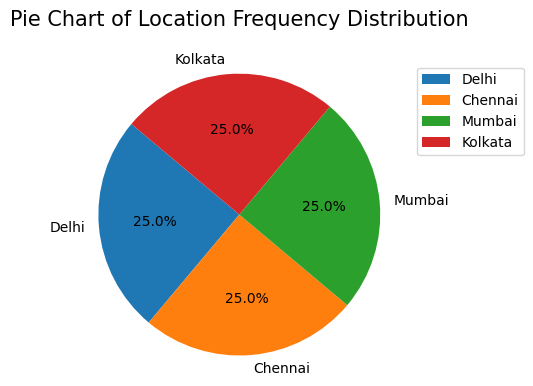

In [19]:
location_counts = store_data['Location'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Location Frequency Distribution',fontsize=15, pad=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()

**Analysis**
* **Visual Representation:** Pie charts provide a clear and intuitive visual representation of proportions, making it easy to see the distribution of unique values in the location column at a glance
* **Comparison**: By displaying each unique value as a slice of the pie, viewers can compare the relative frequencies or proportions of different locations easil
* **Insight Generation:** Pie charts help identify dominant or prevalent locations as well as any outliers or less common locations, which can provide valuable insights for decision-making and analys
* **Communicating Findings:** Pie charts are effective for presenting summary statistics or findings related to unique values in a concise and visually appealing manner, making them suitable for reports, presentations, or dashboa
* 	Location column has equal frequency occurrence each has 25% of frequency. There is four main cities Kolkata, Mumbai, Delhi, Chennai, each has same eight value conts.


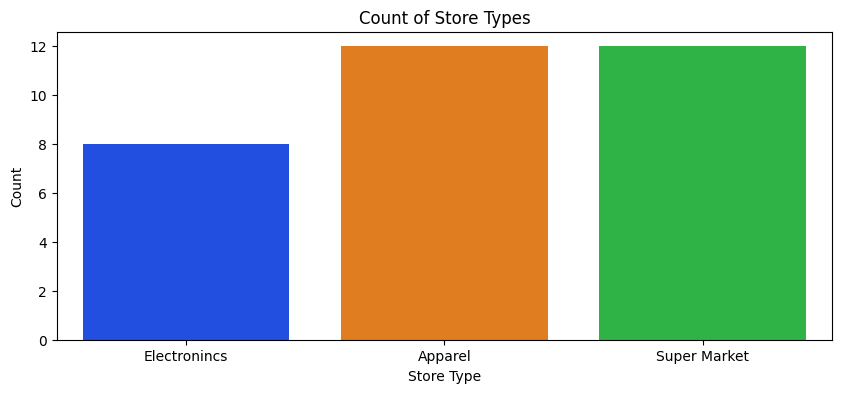

In [20]:
store_type_counts = store_data['StoreType'].value_counts()
plt.figure(figsize=(10, 4))

sns.countplot(data=store_data, x='StoreType',hue='StoreType', palette='bright', legend=False)

plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')

plt.show()


**Analysis** 
* **Store type Apparel has highest value counts 12**, Stores with a high count of store types may enjoy a dominant position in the market, benefiting from economies of scale and greater brand recognition* **Super Market has also highest and same value counts as Apparel**, a high count of store types allows for greater diversification in product offerings, catering to a broader range of customer preferences and increasing market penetration
* **Electronics has value counts 8**, stores with a low count of store types may target niche markets or specific customer segments, allowing for focused marketing efforts and differentiation from competitors


### Calculation of Operating Cost and Basket size ratio

In [18]:
store_data['OperatingCost_BasketSize_Ratio'] = store_data['OperatingCost'] / store_data['BasketSize']

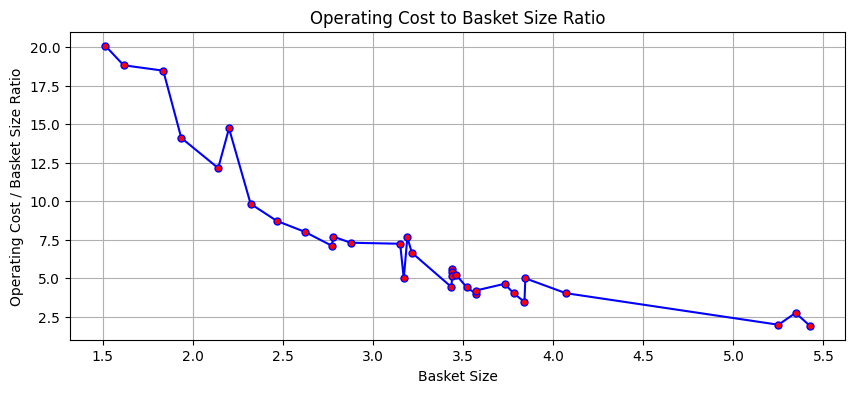

In [19]:
plt.figure(figsize=(10, 4))

store_data_sorted = store_data.sort_values(by='BasketSize')

plt.plot(store_data_sorted['BasketSize'], store_data_sorted['OperatingCost_BasketSize_Ratio'], color='blue', marker='o', markersize=5, markerfacecolor='red')
plt.title('Operating Cost to Basket Size Ratio')
plt.xlabel('Basket Size')
plt.ylabel('Operating Cost / Basket Size Ratio')
plt.grid(True)
plt.show()


**Analysis** In the above image, there are so many peaks in this line plot, when basket size low then the ratio of operating cost and basket size is high and vice versa. Both are indirectly proportional. **A low basket size indicates that customers are not spending much on each visit to the store. If the operating costs remain high or are increasing, it means that the store is spending a significant amount of money to maintain operations, but the revenue generated from each customer's purchase is not proportionate**. **A rising ratio of operating cost to basket size could be a warning sign for profitability concerns**. If the store is unable to cover its operating costs with the revenue generated from sales, it may lead to financial difficulties and ultimately impact the store's sustainability.

### Correlation matrix on numerial or quamtitative columns

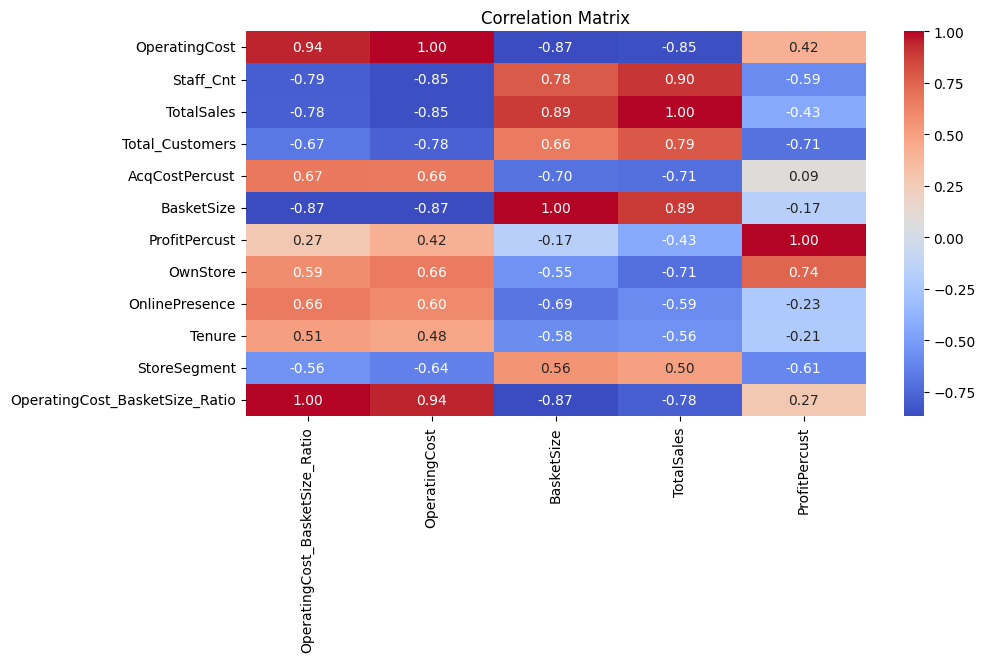

In [20]:
numerical_columns = store_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = store_data[numerical_columns].corr()
relevant_variables = ['OperatingCost_BasketSize_Ratio', 'OperatingCost', 'BasketSize', 'TotalSales', 'ProfitPercust']
correlation_matrix = correlation_matrix[relevant_variables]
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Analysis** 
In the above figure, a heat map is presented to demonstrate the co-relation between the given parameter, where strongly negative and strongly positive relation has been established. **OperatingCost_BasketSize ration has negative strong relation with basket size and total sales.** Tenure has negative relation with basket size and total sales. **Total customer has negative relation with operating cost** and **Total Sales has correlation with operating cost as well as staff count**.

### Total Profit Per Store

In [24]:
store_data['Total_Profit'] = store_data['Total_Customers'] * store_data['ProfitPercust']

total_profit_per_store = store_data.groupby('StoreName')['Total_Profit'].sum().reset_index()

print(total_profit_per_store)


          StoreName  Total_Profit
0      Apparel Zone      17261.62
1     Central Store      11915.47
2     Digital Bazar      10874.15
3  Electronics Zone      10976.45
4     Fashion Bazar      15052.70
5       Super Bazar       6538.17
6      Super Market       8473.60


**Analysis**
* The above bar plot clearly defines **ApparelZone store has highest total profit 17261.62**, high sales provide stores with the financial resources and competitive edge needed to thrive in the marketplace
* **Fashion Bazer grabs the second position 15052.70**
* **Central Store is in the third position 11915.47**, lower sales present significant obstacles to a store's success and may require strategic adjustments to improve performance and regain competitiveness in the market


In [ ]:
plt.figure(figsize=(10, 4))

colors = ['Salmon', 'SkyBlue', 'Green', 'Coral', 'Pink', 'yellow', 'violet']

plt.bar(total_profit_per_store['StoreName'], total_profit_per_store['Total_Profit'], color=colors, edgecolor='black')

plt.title('Total Profit of Each Store')
plt.xlabel('Store Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analysis** 
* The above bar plot clearly defines **ApparelZone store has highest total profit 17261.62**, high sales provide stores with the financial resources   and competitive edge needed to thrive in the marketplace
* **Fashion Bazer grabs the second position 15052.7**
* **Central Store is in the third position 11915.47**, lower sales present significant obstacles to a store's success and may require strategic adjustments   to improve performance and regain competitiveness in the mark
* Bar plots are an effective way to communicate the profitability of stores to stakeholders, presenting complex financial data in a clear and concious
* Stakeholders can use the visualizations to make informed decisions regarding resource allocation, investment opportunities, or strategic planning     based on the profitability of each store 

### Percentage Demonstration of Total Profit per each Store

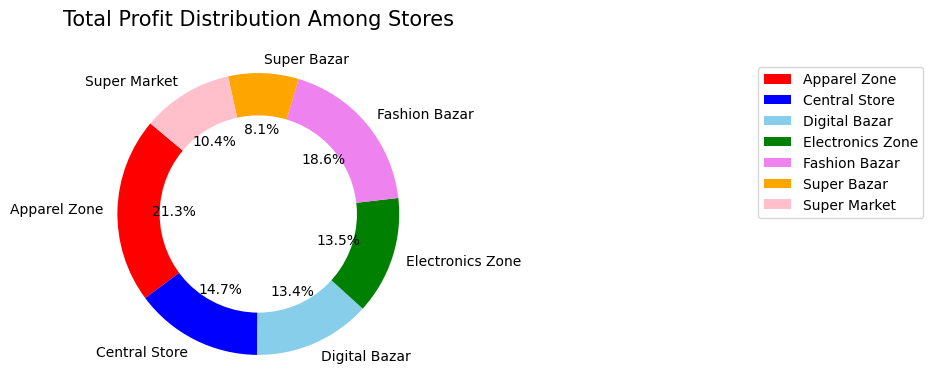

In [26]:
colors = ['red','blue','skyblue','green','violet','orange', 'pink']
plt.figure(figsize=(4,4))
plt.pie(total_profit_per_store['Total_Profit'], labels=total_profit_per_store['StoreName'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Profit Distribution Among Stores', fontsize=15, pad=25)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(bbox_to_anchor=(2.09,1), loc='upper left')
plt.show()

**Analysis:** 
Here is the demonstration of percentage of total profit of each stores. 
* Here it is seen that **"Apparel Zone"** has **21.3%** of total profit, if the percentage of total profit is high, it indicates that the business is generating a significant portion of its revenue as profit, which is a **positive sign of financial health and efficiency**
* **"Fashion Bazar"** has **18.6%** of total profit, this could be due to effective cost management, strong sales performance, and high-profit margins. Conversely, if the percentage of total profit is low, it suggests that the business is struggling to generate profits relative to its total revenue.
* **"Central Store"** has **14.7%** of total profit, analyzing the percentage of total profit helps businesses assess their profitability and identify areas for improvement to enhance overall financial performance.
* There are the three stores with highest total profit.  

### Calculation on Average Basket Size

In [27]:
average_basket_size = store_data['BasketSize'].mean()
print(average_basket_size)

3.2172500000000004


### Basket Size per Customer Calculation

In [28]:
store_data['BasketSize_Per_Customer'] = store_data['BasketSize'] / store_data['Total_Customers']
print(store_data['BasketSize_Per_Customer'])

0     0.023818
1     0.026136
2     0.024946
3     0.029227
4     0.019657
5     0.032952
6     0.014571
7     0.051452
8     0.033158
9     0.027967
10    0.027967
11    0.022611
12    0.020722
13    0.021000
14    0.025610
15    0.025228
16    0.023239
17    0.033333
18    0.031058
19    0.028231
20    0.025412
21    0.023467
22    0.022900
23    0.015673
24    0.021971
25    0.029318
26    0.023516
27    0.013389
28    0.012008
29    0.015829
30    0.010657
31    0.025505
Name: BasketSize_Per_Customer, dtype: float64


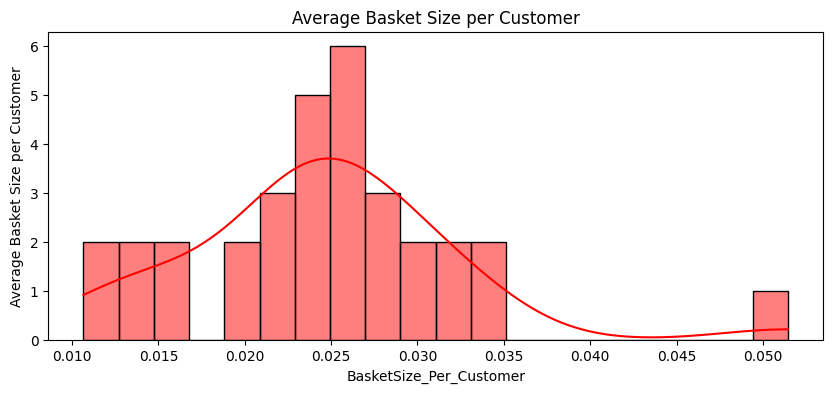

In [29]:
plt.figure(figsize=(10, 4))

sns.histplot(x=store_data['BasketSize_Per_Customer'], bins=20, kde=True, color='red')

plt.title('Average Basket Size per Customer')
plt.ylabel('Average Basket Size per Customer')
plt.show()

**Analysis**
* The average basket size is 3.21
* Basket size per customer is independant variable and average basket size per customer is dependant variable
* The kernal probability density is **right skewed Normal Distribution**
* When the average basket size per customer is **4** then basket size per custome is in between **0.011 to 0.014**
* The highest average basket size per customer is near about **13** then the basket size per customer is **0.023 to 0.027**
* On the other hand, when basket size per customer is in between **0.040 and 0.045** the line of KDE touches X-Axis that means average basket size per customer is 0
* A **low average basket size per customer indicates that customers are purchasing fewer items per transaction**
* Conversely, **a high average basket size per customer suggests that customers are purchasing multiple items in each transaction, leading to higher revenue per transaction and potentially higher overall revenue without needing as many transactions**

### Calculation on Operating Cost per Sale

In [30]:
store_data['OperatingCost_Per_Sale'] = store_data['OperatingCost'] / store_data['TotalSales']
store_data['OperatingCost_Per_Sale']

0     0.131250
1     0.131250
2     0.211111
3     0.082946
4     0.051944
5     0.080444
6     0.039722
7     0.166326
8     0.161932
9     0.114558
10    0.106205
11    0.059463
12    0.062727
13    0.055112
14    0.022034
15    0.022609
16    0.033409
17    0.411690
18    0.401585
19    0.476793
20    0.179017
21    0.048742
22    0.050000
23    0.038000
24    0.048000
25    0.345570
26    0.216126
27    0.319664
28    0.045014
29    0.135862
30    0.049834
31    0.176860
Name: OperatingCost_Per_Sale, dtype: float64

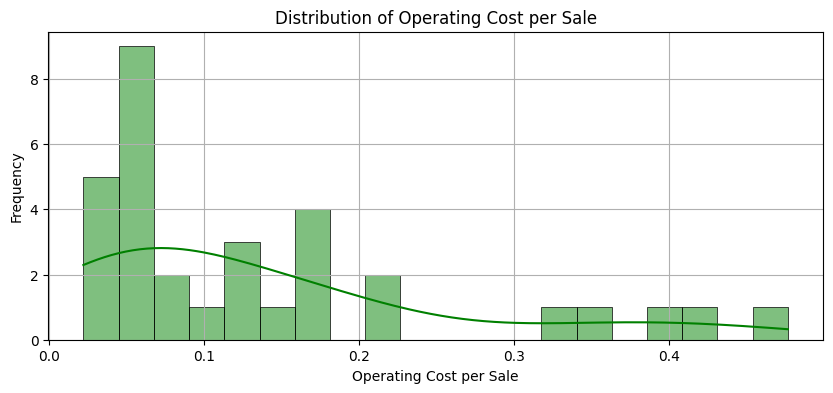

In [31]:
plt.figure(figsize=(10, 4))
sns.histplot(store_data['OperatingCost_Per_Sale'], bins=20, kde=True, color='green', linewidth=0.5)
plt.title('Distribution of Operating Cost per Sale')
plt.xlabel('Operating Cost per Sale')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis**
* The above KDE plot defines the probability density of **Operating Cost per Sale** **right skewed Normal Distribution**. Right skewed Normal Distribution is often known as **Positive Distribution**
* In this Histogram Plot Operating Cost per Sale is independant variable and its frequency is dependant variable
* When the bin is above **eight (8)** and it is high then Operating Cost per Sale is between **0.0 to 0.1**.  High operating costs can eat into the profits of the business, leading to lower profit margins. This can limit the amount of revenue that the business retains after covering its expenses. Businesses may struggle to meet their financial obligations, leading to bankruptcy or closure.
* On the other hand, Operatig cost per sale is above **two(2)** there is no such ups and downs in the probability density, lower operating costs can contribute to the financial stability of a business by ensuring that expenses are kept in check and revenue streams are sufficient to cover costs. This reduces the risk of financial strain or insolvency, especially during economic downturns or periods of reduced revenue. Lower operating costs mean that a higher proportion of the business's revenue is available as profit. This can lead to improved profit margins and increased profitability over time. 

### Calculation on Profit Margin

In [32]:
store_data['Profit_Margin'] = (store_data['TotalSales'] - store_data['OperatingCost']) / store_data['TotalSales']
store_data['Profit_Margin'] 

0     0.868750
1     0.868750
2     0.788889
3     0.917054
4     0.948056
5     0.919556
6     0.960278
7     0.833674
8     0.838068
9     0.885442
10    0.893795
11    0.940537
12    0.937273
13    0.944888
14    0.977966
15    0.977391
16    0.966591
17    0.588310
18    0.598415
19    0.523207
20    0.820983
21    0.951258
22    0.950000
23    0.962000
24    0.952000
25    0.654430
26    0.783874
27    0.680336
28    0.954986
29    0.864138
30    0.950166
31    0.823140
Name: Profit_Margin, dtype: float64

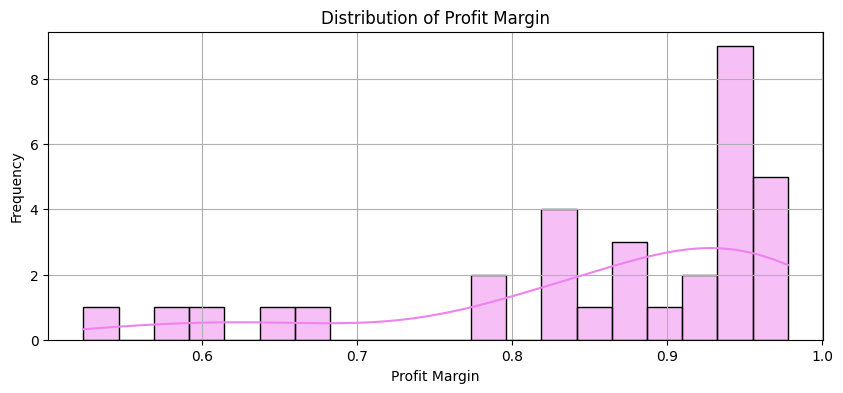

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(store_data['Profit_Margin'], bins=20, kde=True, edgecolor='black', color='violet')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis**
* **Profit margin KDE plot is high above eight(8) when profit margin is between 0.9 to 1.0,** high profit margins are a key indicator of a successful ecommerce business, reflecting efficiency, competitiveness, and financial strength. However, it's essential for businesses to balance profit margins with other factors, such as customer satisfaction, market share, and long-term sustainability
* The KDE plot is **Left shewed Normal Distribution** often it is known as **Negative Distribution**, Profit margin is **Independent Variable**
* Overall, understanding the distribution of profit margins enables better decision-making, risk management, and strategic planning, ultimately contributing to the overall financial health and success of the business * It helps in identifying potential risks and vulnerabilities. Stores with volatile or declining profit margins may require closer monitoring or intervention to mitigate risks and maintain profitability
* Knowledge of profit margin distributions can inform strategic planning and resource allocation. For instance, investing more resources in stores with high-profit margins or implementing cost-saving measures in stores with low-profit margins.


### Calculation on Operating Efficiency Score

In [34]:
store_data['Operating_Efficiency_Score'] = store_data['TotalSales'] / store_data['OperatingCost']
store_data['Operating_Efficiency_Score']

0      7.619048
1      7.619048
2      4.736842
3     12.056075
4     19.251337
5     12.430939
6     25.174825
7      6.012295
8      6.175439
9      8.729167
10     9.415730
11    16.817073
12    15.942197
13    18.144737
14    45.384615
15    44.230769
16    29.931973
17     2.429012
18     2.490132
19     2.097345
20     5.586047
21    20.516129
22    20.000000
23    26.315789
24    20.833333
25     2.893773
26     4.626923
27     3.128289
28    22.215190
29     7.360406
30    20.066667
31     5.654206
Name: Operating_Efficiency_Score, dtype: float64

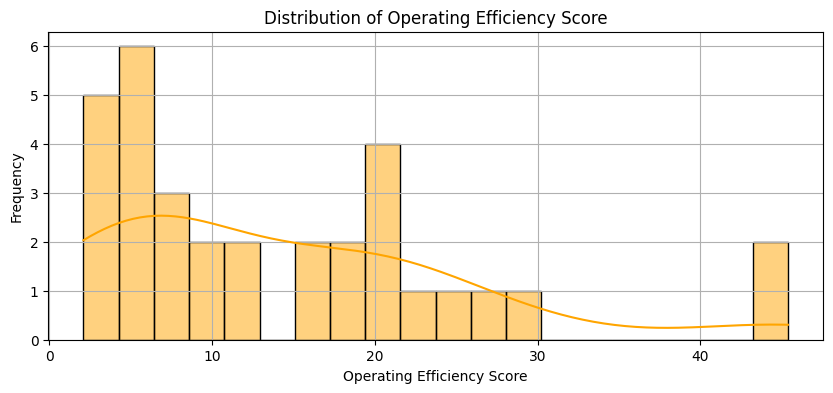

In [35]:
plt.figure(figsize=(10, 4))
sns.histplot(store_data['Operating_Efficiency_Score'], bins=20, kde=True, color='orange')
plt.title('Distribution of Operating Efficiency Score')
plt.xlabel('Operating Efficiency Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis**
* **Operating Efficiency Score is almost high at one to four and frequency is six (6), as well as at the position of twenty (20)**. High operating efficiency often translates into strong financial performance, with healthy profit margins, return on investment, and cash flow. The business is able to generate profits while maintaining financial stability
* Low operating efficiency often translates into weaker financial performance, with lower profit margins, return on investment, and cash flow. The business may struggle to generate profits or maintain financial stability
* Understanding the distribution of operating efficiency costs informs strategic planning and decision-making. It helps businesses set realistic cost reduction targets, prioritize initiatives, and develop strategies to improve operational efficiency and reduce costs over time
* Operating efficiency costs directly impact profitability. Analysing the distribution of these costs helps in assessing their impact on overall profitability and identifying opportunities to enhance profitability by optimizing operational efficiency

### Calculation on Relative Operating Cost

In [3]:
average_operating_cost = store_data['OperatingCost'].mean()
store_data['Relative_OperatingCost'] = store_data['OperatingCost'] / average_operating_cost
store_data['Relative_OperatingCost'] 

0     1.045264
1     1.045264
2     1.134858
3     1.065173
4     0.930782
5     0.900918
6     0.711775
7     1.214497
8     1.134858
9     0.955670
10    0.885985
11    0.816301
12    0.861098
13    0.756572
14    0.517654
15    0.517654
16    0.731685
17    1.612692
18    1.513144
19    1.687354
20    1.070151
21    0.771504
22    0.756572
23    0.662000
24    0.955670
25    1.358843
26    1.294136
27    1.513144
28    0.786436
29    0.980557
30    0.746617
31    1.065173
Name: Relative_OperatingCost, dtype: float64

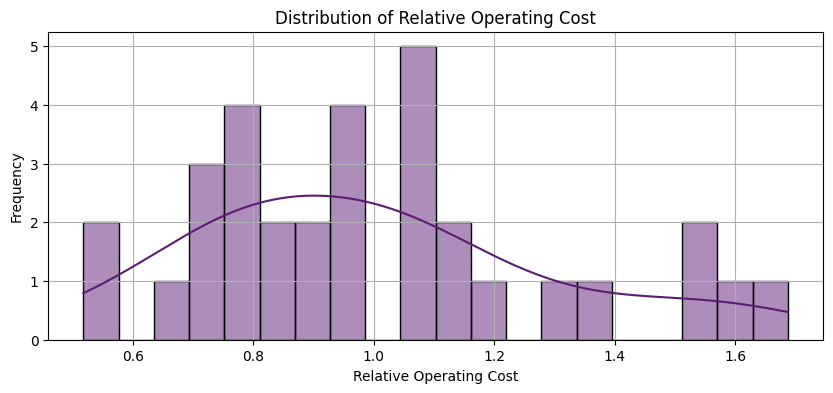

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(store_data['Relative_OperatingCost'], bins=20, kde=True, color='#5c1c74')
plt.title('Distribution of Relative Operating Cost')
plt.xlabel('Relative Operating Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Analysis**
* This KDE plot is right skewed normal distribution, there are few gaps in this graph that means there is no such data. 
* Higher relative operating costs can lead to lower profitability as a larger portion of revenue is allocated to covering operational expenses
* Lowering relative operating costs through efficiency improvements can lead to a more sustainable business model by reducing resource consumption and environmental impact
* This KDE plot is right skewed normal distribution, there are few gaps in this graph that means there is no such data.
* Higher relative operating costs can lead to lower profitability as a larger portion of revenue is allocated to covering operational expenses
* Lowering relative operating costs through efficiency improvements can lead to a more sustainable business model by reducing resource consumption and environmental impact
* Analysing the distribution helps businesses identify the proportion of total sales allocated to operating costs. It allows for effective cost management strategies by pinpointing areas where costs are relatively high or low compared to revenue.
* Overall, analysing the distribution of relative operating costs is essential for effective cost management, profitability analysis, benchmarking, resource allocation, strategic planning, and performance evaluation in business operations
* Relative operating costs directly impact profitability. By examining their distribution, businesses can assess the profitability of different stores or segments. Stores with a higher proportion of operating costs may have lower profitability margins, highlighting areas for improvement

In [38]:
total_profit = store_data['TotalSales'].sum() - store_data['OperatingCost'].sum()

print("Total Profit:", total_profit)


Total Profit: 6740.199999999999


In [39]:
total_profit_customers = (store_data['Total_Customers'] * store_data['ProfitPercust']).sum()

print("Total Profit based on Total Customers:", total_profit_customers)


Total Profit based on Total Customers: 81092.16


## Key Performance Indicator (KPI)

In [6]:
kpi_metrics = {
    'Total_Sales': store_data['TotalSales'].sum(),
    'Average_Transaction_Value': store_data['TotalSales'].mean(),
    'Conversion_Rate': store_data['Total_Customers'].sum() / len(store_data),
    'Gross_Profit': (store_data['TotalSales'] - store_data['OperatingCost']).sum(),
    
}
print("Key Performance Indicators (KPIs):")
for kpi, value in kpi_metrics.items():
    print(f"{kpi}: {value}")

Key Performance Indicators (KPIs):
Total_Sales: 7383.099999999999
Average_Transaction_Value: 230.72187499999998
Conversion_Rate: 146.6875
Gross_Profit: 6740.2


**Analysis**
KPIs serve as essential tools for measuring, monitoring, and managing business performance in both traditional and e-commerce settings. They facilitate informed decision-making, goal setting, performance evaluation, continuous improvement, customer-centricity, competitive positioning, and resource optimization, ultimately contributing to long-term success and sustainability. Here in this above code **Total Sales is counted as 7383.09999998, Average Transaction Value is 230.72187499999998, Conversion Rate is 146.6875, Gross Profit is 6740.2**

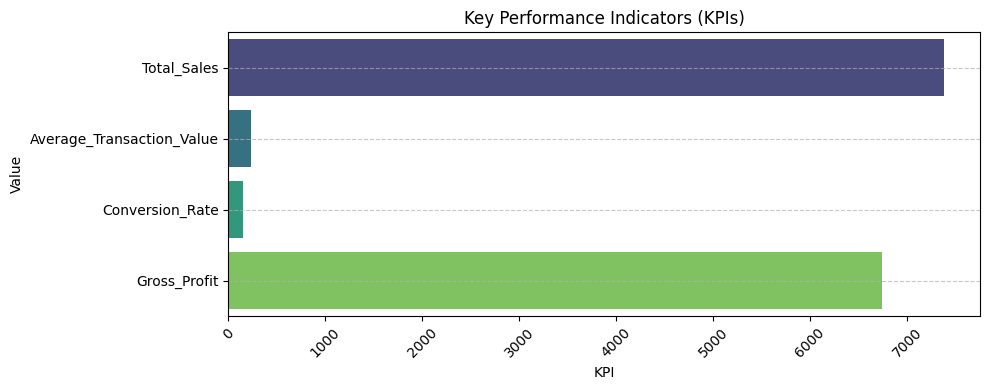

In [7]:
kpi_df = pd.DataFrame.from_dict(kpi_metrics, orient='index', columns=['Value'])

plt.figure(figsize=(10, 4))
sns.barplot(data=kpi_df.reset_index(), y='index', x='Value', hue='index', palette='viridis', dodge=False, legend=False)
plt.title('Key Performance Indicators (KPIs)')
plt.xlabel('KPI')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis**
* KPIs provide quantitative metrics to assess the performance of various aspects of an ecommerce business, such as sales, marketing, customer service, and operations. They offer insights into whether the business is meeting its objectives and targets
* KPIs provide measurable metrics to assess the performance and health of a business. They help track progress towards strategic goals and objectives, allowing stakeholders to monitor performance trends over time
* KPIs offer valuable insights that inform decision-making processes. By analysing KPI data, businesses can identify areas of strength and weakness, enabling them to make informed decisions to optimize operations, marketing strategies, and resource allocation
* KPIs help establish clear and achievable goals for different aspects of the business, such as sales targets, customer satisfaction levels, and operational efficiency. Aligning KPIs with broader organizational objectives ensures that efforts are focused on driving outcomes that contribute to overall success
* KPIs facilitate performance evaluations at various levels of the organization, from individual employees to departments and the entire company. They provide a standardized framework for assessing performance, identifying areas for improvement, and recognizing achievements.
* **Gross Profit is 6740.2**, Gross profit is a critical KPI in ecommerce as it represents the revenue remaining after subtracting the cost of goods sold (COGS). It indicates the profitability of selling products and services and is a key measure of business efficiency
* **Conversion Rate is 146.6875, A conversion rate of 146.6875** typically indicates the number of successful conversions (e.g., purchases, sign-ups, etc.) achieved per 100 visitors or interactions with a website, advertisement, or campaign. However, a conversion rate of 146.6875 seems unusually high and may be an incorrect calculation or a misinterpretation of the data
* **Average Transaction Value is 230.7218, an average transaction value of 230.72187499999998** represents the average amount of money spent per transaction in the dataset. This means that, on average, each transaction generates a revenue of approximately 230.72
* **Total Sales is 7383.099, A total sales value of 7383.099999999999** represents the sum of all sales transactions recorded in the dataset, it indicates the total revenue generated by all transactions combined, which amounts to approximately 7383.10.

### The highest total sales of Each Store

In [8]:
store_total_sales = store_data.groupby('StoreName')['TotalSales'].sum()
store_total_sales

StoreName
Apparel Zone        1449.1
Central Store       1106.9
Digital Bazar       1077.7
Electronics Zone    1140.8
Fashion Bazar       1437.0
Super Bazar          471.6
Super Market         700.0
Name: TotalSales, dtype: float64

**Analysis**
In the above code it is stated that Total sales of each store of this dataset, **Apparel Zone has 1449.1 total sales, Central Store has 1106.9, Digital Bazar has 1077.7**, these three are the first top three store whose have top three total sales These three stores have overall good selling among the all-other stores.

In [9]:
store_total_sales = store_data.groupby('StoreName')['TotalSales'].sum()

store_highest_sales = store_total_sales.idxmax()
highest_sales_amount = store_total_sales.max()

print(f"The store with the highest total sales is '{store_highest_sales}' with total sales of ${highest_sales_amount:.2f}")

The store with the highest total sales is 'Apparel Zone' with total sales of $1449.10


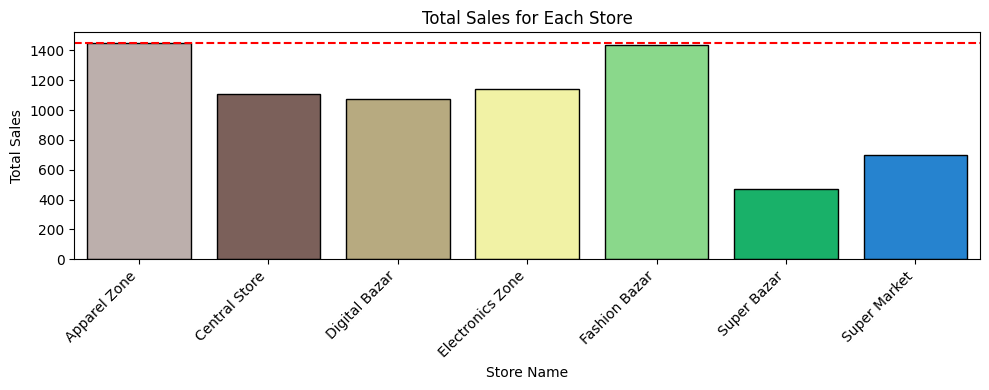

In [10]:
store_total_sales = store_data.groupby('StoreName')['TotalSales'].sum().reset_index()

store_highest_sales = store_total_sales.loc[store_total_sales['TotalSales'].idxmax()]

plt.figure(figsize=(10, 4))
sns.barplot(data=store_total_sales, x='StoreName', y='TotalSales', hue='StoreName', dodge=False, palette='terrain_r', edgecolor='black')
plt.title('Total Sales for Each Store')
plt.xlabel('Store Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.axhline(store_highest_sales['TotalSales'], color='red', linestyle='--', label=f'Highest Sales: {store_highest_sales["StoreName"]}')

plt.tight_layout()
plt.show()

**Analysis**
* Close reading of this analysis conveys the store with the highest total sales is **"Apparel Zone"** with total sales of **1449.10**, if a store has the **highest sales compared to others, it indicates that it is performing exceptionally well in terms of generating revenue**
* The second highest store is **"Fashion Bazar"**, which has total sales **1437**, there are various factors that are responsible such as its strategic location, effective marketing campaigns, high customer demand, or superior product offerings
* The third highest store is **"Electronics Zone"**, which has total sales **1140**, if a store has the **lowest sales**, it suggests that it may be **facing challenges in attracting customers or driving sales**
* Possible reasons for low sales could include **poor visibility, unfavorable location, ineffective marketing efforts, or subpar product quality**
* Identifying the store with the highest and lowest sales enables businesses to understand the spectrum of performance across their outlets and implement strategies to improve underperforming stores while capitalizing on successful ones

### Demonstration of Location-wise Total Sales

In [12]:
location_total_sales = store_data.groupby('Location')['TotalSales'].sum().reset_index()

location_total_sales.columns = ['Location', 'TotalSales']

print(location_total_sales)

  Location  TotalSales
0  Chennai      2235.4
1    Delhi      1777.7
2  Kolkata      1612.4
3   Mumbai      1757.6


**Analysis:** Location-wise total sales calculation is really important for the E-commerce Business purpose. It is important to know in which location is selling and grabbing huge sales. Here in the upper calculation **Chennai comes first with the highest total sales with 2235.4, Delhi comes second with 1777.7 total sales, Mumbai comes third with 1757.6 total sales**, and Kolkata comes last and in the fourth position with 1612.4 total sales.

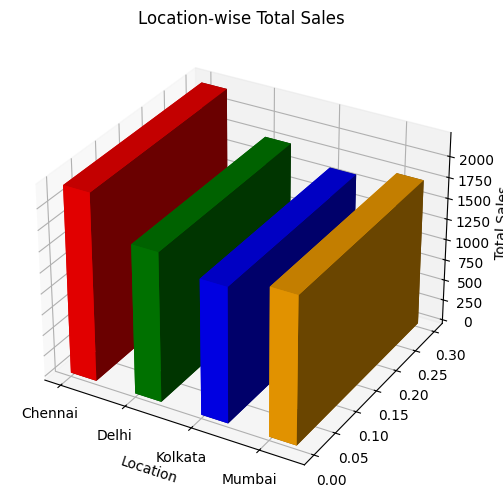

In [14]:
locations = location_total_sales['Location']
total_sales = location_total_sales['TotalSales']

colors = ['red', 'green', 'blue', 'orange', 'purple'] 

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(locations))

bar_width = 0.4
bar_depth = 0.3

for i, (x, sales) in enumerate(zip(x_pos, total_sales)):
    ax.bar3d(x, 0, 0, bar_width, bar_depth, sales, color=colors[i % len(colors)])

ax.set_xlabel('Location')
ax.set_ylabel('')
ax.set_zlabel('Total Sales')
ax.set_xticks(x_pos)
ax.set_xticklabels(locations)

plt.title('Location-wise Total Sales')
plt.show()

**Analysis**
* When location-wise profit is high, it suggests that certain geographic areas or stores are generating greater revenue relative to others
* **Chennai** comes **first** in the highest position with total sales **2235.4**, this could be attributed to factors such as **higher customer demand**, **better marketing strategies**, or **more favorable market conditions** in those locations
* **Delhi** comes **second** in the second highest position with total sales **1777.7**
* **Mumbai** comes **third** in the third highest position with total sales **1757.6**
* **Kolkata** comes **fourth** in the fourth highest position with total sales **1612.4**, when **location-wise profit is low**, it may indicate challenges such as **lower sales volumes**, **higher operating costs**, or **less effective management** in those areas
* Analyzing location-wise profit can help businesses **identify areas of strength and weakness**, **optimize resource allocation**, and **develop targeted strategies** to **improve performance in specific geographic regions**

### Distribution of operating costs across different store types

In [47]:
operating_cost_stats = store_data.groupby('StoreType')['OperatingCost'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

operating_cost_stats.columns = ['StoreType', 'Mean_OperatingCost', 'Median_OperatingCost', 'Std_OperatingCost', 'Min_OperatingCost', 'Max_OperatingCost']

print("Summary Statistics of Operating Costs Across Different Store Types:")

print(operating_cost_stats)


Summary Statistics of Operating Costs Across Different Store Types:
      StoreType  Mean_OperatingCost  Median_OperatingCost  Std_OperatingCost  \
0       Apparel           18.608333                 16.80           6.068766   
1  Electronincs           18.400000                 20.10           5.006567   
2  Super Market           22.700000                 21.45           6.138700   

   Min_OperatingCost  Max_OperatingCost  
0               10.4               32.4  
1               10.4               24.4  
2               15.8               33.9  


Analysis:
* **Apparel Zone is coming first as its average operating cost is highest with 32.40**, minimum operating cost 10.40, mean operating cost is 18.61
* **Electronics Store is coming with maximum operating cost 24.40,** minimum operating cost 10.40, mean operating cost is 18.61
* **Super Market is coming with maximum operating cost 33.90**, minimum operating cost 15.80, mean operating cost is 22.70


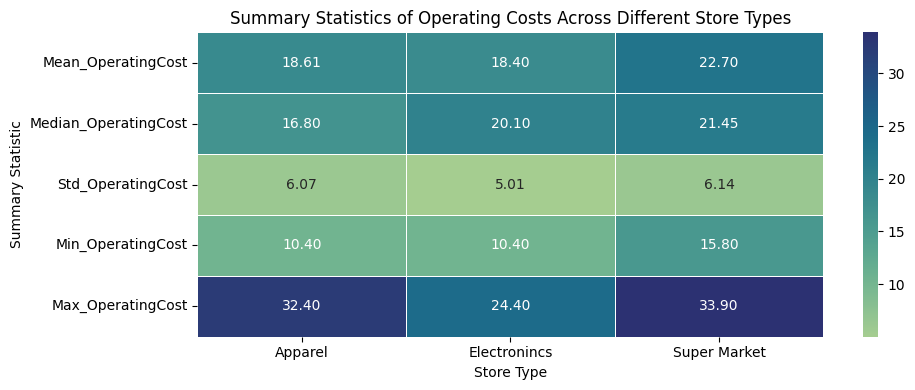

In [48]:
plt.figure(figsize=(10, 4))

heatmap_data = operating_cost_stats.set_index('StoreType').T

sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Summary Statistics of Operating Costs Across Different Store Types')
plt.xlabel('Store Type')
plt.ylabel('Summary Statistic')
plt.tight_layout()
plt.show()

**Analysis** 
* **Apparel Zone** is coming first as its **average operting cost is highest with 32.40**, **minimum operating cost 10.40**, **mean operating cost is 18.61**
* **Electronincs Store** is coming with **maximum operating cost 24.40**, **minimum operating cost 10.40**, **mean operating cost is 18.61**
* **Super Market** is coming with **maximum operating cost 33.90**, **minimum operating cost 15.80**, **mean operating cost is 22.70**

### Effect of Tenure on Total Sales

In [49]:
average_sales_by_tenure = store_data.groupby('Tenure')['TotalSales'].mean().reset_index()

average_sales_by_tenure.columns = ['Tenure', 'AverageTotalSales']

store_data = store_data.merge(average_sales_by_tenure, on='Tenure', how='left')

print(store_data.head())


  StoreCode         StoreName     StoreType Location  OperatingCost  \
0    STR101  Electronics Zone  Electronincs    Delhi           21.0   
1    STR102      Apparel Zone       Apparel    Delhi           21.0   
2    STR103       Super Bazar  Super Market    Delhi           22.8   
3    STR104      Super Market  Super Market    Delhi           21.4   
4    STR105     Central Store  Super Market    Delhi           18.7   

   Staff_Cnt  TotalSales  Total_Customers  AcqCostPercust  BasketSize  ...  \
0         60       160.0              110            3.90       2.620  ...   
1         60       160.0              110            3.90       2.875  ...   
2         40       108.0               93            3.85       2.320  ...   
3         60       258.0              110            3.08       3.215  ...   
4         80       360.0              175            3.15       3.440  ...   

   Tenure  StoreSegment  OperatingCost_BasketSize_Ratio  Total_Profit  \
0       4             4        

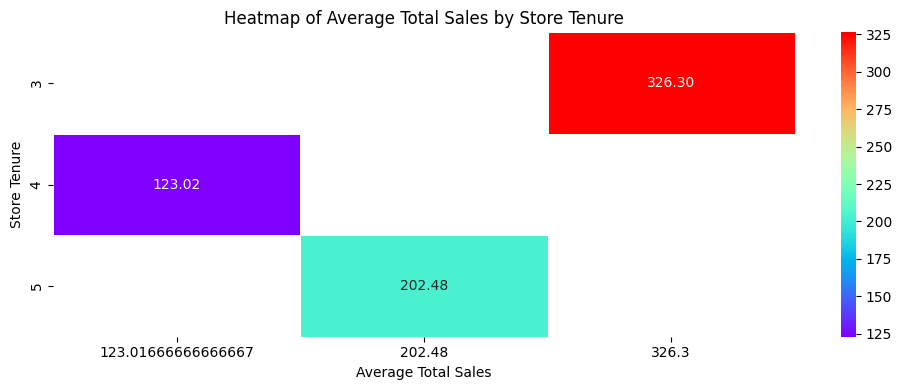

In [50]:
heatmap_data = average_sales_by_tenure.pivot(index='Tenure', columns='AverageTotalSales', values='AverageTotalSales')

plt.figure(figsize=(10, 4))
sns.heatmap(data=heatmap_data, cmap='rainbow', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Average Total Sales by Store Tenure')
plt.xlabel('Average Total Sales')
plt.ylabel('Store Tenure')
plt.tight_layout()
plt.show()

Analysis
* When **store Tenure is 4 then Average Total Sales is 123.02** when the store tenure is 4, and the average total sales are $123.02, it implies that stores with a tenure of 4 (which could represent the number of years since establishment or another time unit) have an average total sales value of 123.02
* When **store Tenure is 5 then Average Total Sales is 202.48** when the store tenure is 5, and the average total sales are 202.48, it implies that stores with a tenure of 5 (which could represent the number of years since establishment or another time unit) have an average total sales value of 202.48
* When **store Tenure is 3 then Average Total Sales is 326.30** when the store tenure is 3, and the average total sales are 326.30, it implies that stores with a tenure of 3 (which could represent the number of years since establishment or another time unit) have an average total sales value of 326.30


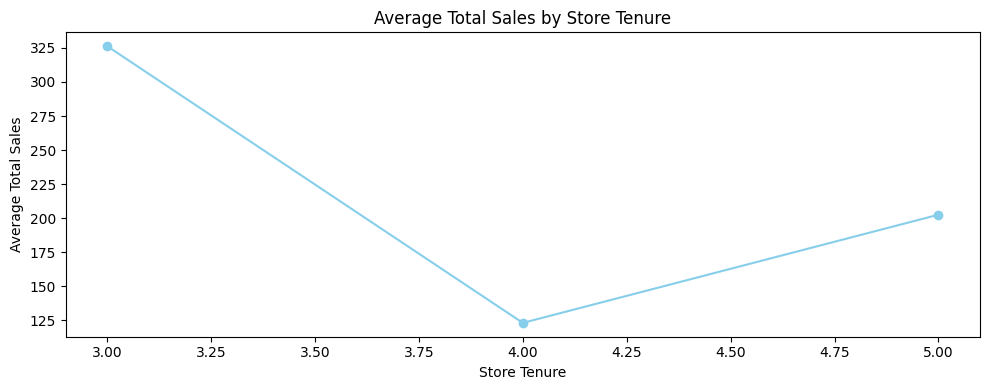

In [51]:
plt.figure(figsize=(10, 4))

plt.plot(average_sales_by_tenure['Tenure'], average_sales_by_tenure['AverageTotalSales'], marker='o', color='skyblue')
plt.title('Average Total Sales by Store Tenure')
plt.xlabel('Store Tenure')
plt.ylabel('Average Total Sales')

plt.tight_layout()
plt.show()


**Analysis**
* When store Tanure is **4** then Avaerage Total Sales is **123.02** when the **store tenure is 4**, and the average **total sales are $123.02**, it implies that stores with a **tenure of 4 (which could represent the number of years since establishment or another time unit) have an average total sales value of 123.02**
* When **store Tanure is **5** then Avaerage Total Sales is 202.48** when the **store tenure is 5, and the average total sales are 202.48**, it implies that stores with a **tenure of 5 (which could represent the number of years since establishment or another time unit) have an average total sales value of 202.48**
* When **store Tanure is 3 then Avaerage Total Sales is 326.30** when the **store tenure is 3, and the average total sales are 326.30**, it implies that **stores with a tenure of 3 (which could represent the number of years since establishment or another time unit) have an average total sales value of 326.30**

### Correlations between Total Customers and Profit per Customer

In [52]:
correlation = store_data['Total_Customers'].corr(store_data['ProfitPercust'])

print("Correlation between Total Customers and Profit per Customer:", correlation)


Correlation between Total Customers and Profit per Customer: -0.7082233888619532


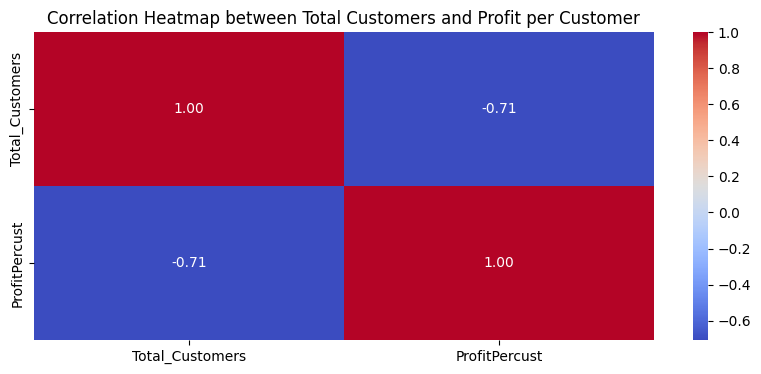

In [12]:
correlation_matrix = store_data[['Total_Customers', 'ProfitPercust']].corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Total Customers and Profit per Customer')
plt.show()

**Analysis**
* Correlation between Total Customers and Profit per Customer is **-0.708223388861953**, that means they are **negatively correlated**
* A **correlation coefficient of -0.708** indicates a **strong negative correlation between Total Customers and Profit per Customer**. This means that as the number of total customers increases, the profit per customer tends to decrease, and vice versa
* From a business perspective, a decrease in profit per customer as the number of customers increases might **indicate issues with pricing strategy, operational inefficiencies, or increased competition driving down profit margins** 

### Comparison of different store segments in terms of profitability

<Figure size 800x400 with 0 Axes>

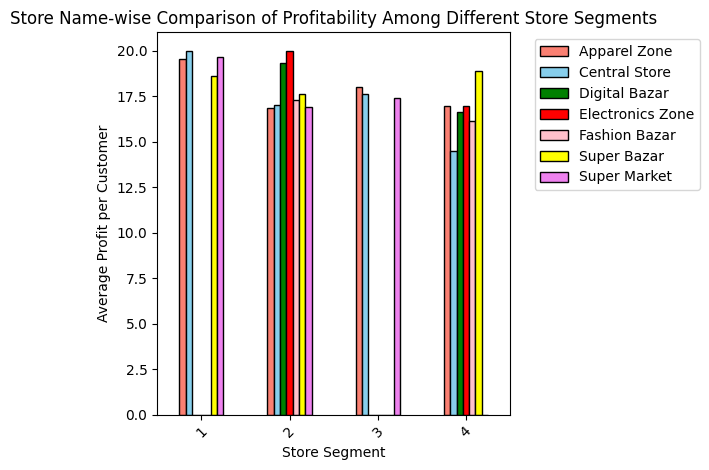

In [53]:
store_segment_profitability = store_data.groupby(['StoreName', 'StoreSegment'])['ProfitPercust'].mean().reset_index()

pivot_store_segment_profitability = store_segment_profitability.pivot(index='StoreSegment', columns='StoreName', values='ProfitPercust')

colors = ['Salmon', 'skyBlue', 'Green', 'red', 'pink', 'yellow', 'violet', 'orange']

plt.figure(figsize=(8, 4))
pivot_store_segment_profitability.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Store Name-wise Comparison of Profitability Among Different Store Segments')
plt.xlabel('Store Segment')
plt.ylabel('Average Profit per Customer')
plt.xticks(rotation=45)
plt.legend(title='Store Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis**
* Each store in the dataset is identified by a unique name. This serves as the **primary identifier** for the stores being analyzed
* Stores are categorized into different segments based on certain criteria such as **location, size, target market, or product offerings**. These segments help in understanding the characteristics and performance of stores within each category
* **Profitability** refers to the ability of a store to generate profits from its operations. It can be measured using various metrics such as **gross profit margin, net profit margin, return on investment (ROI), or profit per customer**
* The analysis involves comparing the profitability metrics across different store segments to identify **patterns, trends, and disparities in performance**. This comparison helps in assessing the relative success of each store segment and identifying areas for improvement
* The analysis can be visualized using **graphs or charts such as bar plots, stacked bar plots, or box plots**. These visualizations provide a clear representation of the profitability differences among store segments and allow stakeholders to interpret the findings more easily
* Overall, the analysis aims to provide insights into the **profitability of different store segments and help stakeholders make informed decisions to optimize performance and drive business growth**


### Average basket size for each store location

In [54]:
average_basket_size_by_location = store_data.groupby('Location')['BasketSize'].mean().sort_values()

print(average_basket_size_by_location)


Location
Kolkata    2.715375
Mumbai     3.031875
Delhi      3.086250
Chennai    4.035500
Name: BasketSize, dtype: float64


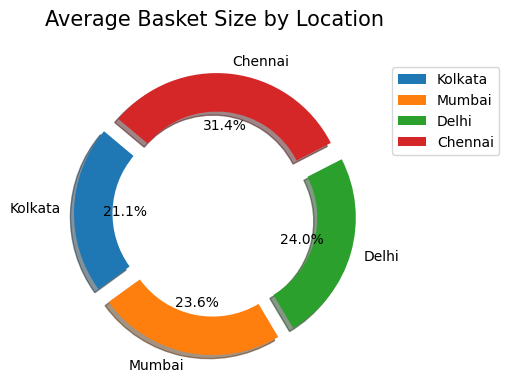

In [55]:
locations = average_basket_size_by_location.index
basket_sizes = average_basket_size_by_location.values
explode = (0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(4, 4))
plt.pie(basket_sizes, labels=locations, autopct='%1.1f%%', explode=explode, startangle=140, shadow=True, wedgeprops=dict(width=0.3))
plt.title('Average Basket Size by Location', fontsize=15, pad=25)
plt.axis('equal') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

centre_circle = plt.Circle((1,1),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


**Analysis** 
* In location-wise Average Basket Size, **Chennai** comes first with **31.4%**, When the **average basket size is high**, it indicates that **customers are purchasing a larger number of items or spending more per transaction**
* In location-wise Average Basket Size, **Delhi** comes first with **24%**, this could be interpreted positively as it suggests **higher levels of customer engagement** and **potentially increased revenue**
* In location-wise Average Basket Size, **Chennai** comes first with **23.6**
* In location-wise Average Basket Size, **Kolkata** comes first with **21.1%**, when the average basket size is **low**, it may imply that customers are making **smaller purchases or fewer items per transaction**
* This could be concerning as it may indicate **lower levels of customer satisfaction, decreased revenue, or inefficiencies in the sales process**
* Understanding and analyzing trends in average basket size can provide valuable insights into consumer behavior and inform strategic decision-making for retailers

### Relationship between online presence and Store name

#### Counts of Online and Offline Presence 

In [61]:
online_delivery=store_data['OnlinePresence'].value_counts()
print(online_delivery)

OnlinePresence
0    19
1    13
Name: count, dtype: int64


In [62]:
online_presence_counts = store_data['OnlinePresence'].value_counts()

online_presence_df = pd.DataFrame({'OnlinePresence': online_presence_counts.index, 
                                   'Count': online_presence_counts.values})
print(online_presence_df)

   OnlinePresence  Count
0               0     19
1               1     13


In [63]:
total_sales=store_data['StoreName'].nunique()
print(total_sales)

7


In [65]:
percentage_per_online_category=(online_delivery/total_sales)*100

print(percentage_per_online_category)

percentage_per_online_category_int = percentage_per_online_category.astype(int)

print(percentage_per_online_category_int)

OnlinePresence
0    271.428571
1    185.714286
Name: count, dtype: float64
OnlinePresence
0    271
1    185
Name: count, dtype: int32


#### Store-wise Online and Offline Presence

In [90]:
online_presence_df = store_data[['StoreName', 'OnlinePresence']].copy()

online_presence_df['OfflinePresence'] = online_presence_df['OnlinePresence'].apply(lambda x: 1 if x == 0 else 0)

online_presence_df['OnlinePresence'] = online_presence_df['OnlinePresence'].apply(lambda x: 1 if x == 1 else 0)

print(online_presence_df)

           StoreName  OnlinePresence  OfflinePresence
0   Electronics Zone               1                0
1       Apparel Zone               1                0
2        Super Bazar               1                0
3       Super Market               0                1
4      Central Store               0                1
5       Apparel Zone               0                1
6      Fashion Bazar               0                1
7      Digital Bazar               0                1
8   Electronics Zone               0                1
9       Apparel Zone               0                1
10       Super Bazar               0                1
11      Super Market               0                1
12     Central Store               0                1
13      Apparel Zone               0                1
14     Fashion Bazar               0                1
15     Digital Bazar               0                1
16  Electronics Zone               0                1
17      Apparel Zone        

**Analysis**
Here is a new dataframe is created to show the name of the stores either they provide their service in online or in offline mode. It keeps the track of the records of offline/online presence of Stores. 

### Visualization of Percentage of Stores of each Online Presence and Offline Presence

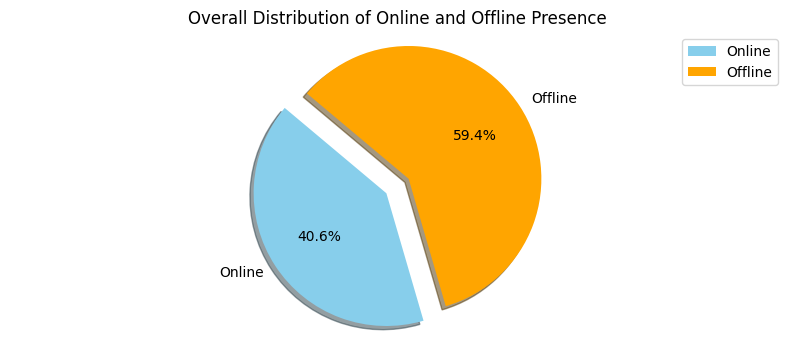

In [104]:
total_online_presence = online_presence_df['OnlinePresence'].sum()
total_offline_presence = online_presence_df['OfflinePresence'].sum()
explode = (0.1, 0.1)
labels = ['Online', 'Offline']
sizes = [total_online_presence, total_offline_presence]
colors = ['skyblue', 'orange']

plt.figure(figsize=(10, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
plt.title('Overall Distribution of Online and Offline Presence')
plt.axis('equal') 

plt.legend(loc="best", fontsize="medium")

plt.show()

**Analysis**
* In the upper graph, it is shown **40.6% of stores out of total percentage** are serving there service to the customer through **online mode**
* it is shown **59.4% of stores out of total percentage** are serving there service to the customer through **offline mode**
* By having an online presence, businesses can reach a **larger audience beyond their physical location**, Unlike brick-and-mortar stores (offline stores) with fixed operating hours, online stores are accessible 24/7, allowing customers to shop at their convenience, regardless of time zones or holidays.
* Maintaining an online presence is often **more cost-effective** than operating brick-and-mortar stores (offline stores). Businesses can save on expenses such as rent, utilities, and staffing while still reaching a wide audience.

**Calculate the Correlation Coefficient**

In [57]:
correlation = store_data['OnlinePresence'].corr(store_data['TotalSales'])
print("Correlation between Online Presence and Total Sales:", correlation)


Correlation between Online Presence and Total Sales: -0.5912270400639474


### Effect of Store on distribution of total customers

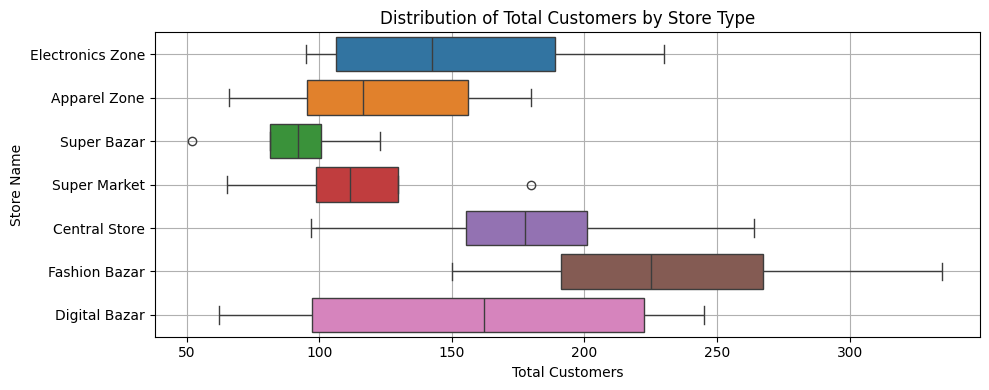

In [58]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=store_data, x='Total_Customers', y='StoreName', hue='StoreName', dodge=False)
plt.title('Distribution of Total Customers by Store Type')
plt.xlabel('Total Customers')
plt.ylabel('Store Name')

plt.legend([],[], frameon=False)

plt.tight_layout()
plt.grid()
plt.show()

**Analysis**
* The **Y-axis** typically shows the **store types**, while the **X-axis** represents the **total number of customers**
* In the case of **Electronics Zone** **1st quartile** is near **110**, **2nd quartile** is near **140**, **3rd quartile** is near **180**
* In the case of **Apparel Zone** **1st quartile** is near **90**, **2nd quartile** is near **120**, **3rd quartile** is near **160**
* In the case of **Super Bazar** **1st quartile** is near **80**, **2nd quartile** is near **90**, **3rd quartile** is near **100**
* In the case of **Super Market** **1st quartile** is near **100**, **2nd quartile** is near **120**, **3rd quartile** is near **140**
* In the case of **Central Store** **1st quartile** is near **160**, **2nd quartile** is near **180**, **3rd quartile** is near **200**
* In the case of **Fashion Bazar** **1st quartile** is near **190**, **2nd quartile** is near **225**, **3rd quartile** is near **270**
* In the case of **Digital Bazar** **1st quartile** is near **90**, **2nd quartile** is near **160**, **3rd quartile** is near **225**
* By comparing the boxplots for different store types, we can observe variations in the distribution of total customers. For example, if one store type has a significantly larger interquartile range like **Digital Bazar** whose **IQR range varies from 90 to 225** it may suggest higher variability in customer counts compared to other store types. **Super Bazar** has lower variability in total customer counts whose **IQR range varies from 80 to 100** 
* Data points lying beyond the whiskers (the lines extending from the boxes) are considered outliers. These points may indicate unusually high or low total customer counts compared to the rest of the data within a particular store type. As we can see outliers in **Super Bazar** which has **low customers**and **Super Market** which has **high customers**
* Analyzing the boxplots can help identify trends or patterns in customer distribution across store types. It may also reveal insights into **customer preferences**, **market demand**, or the **effectiveness of marketing strategies** for different types of stores.

### Calculation on Revenue per Store

In [60]:
store_data['Revenue'] = store_data['TotalSales'] * store_data['Total_Customers']

per_store_revenue = store_data.groupby('StoreName')['Revenue'].sum()

print(per_store_revenue)


StoreName
Apparel Zone        194967.0
Central Store       216957.7
Digital Bazar       206934.4
Electronics Zone    202176.0
Fashion Bazar       331395.0
Super Bazar          45542.5
Super Market         93391.8
Name: Revenue, dtype: float64


In [ ]:
Analysis:
•	Fashion Bazar makes revenue 3,31,395
•	Central Store makes revenue 2,16,957.7
•	Digital Bazar makes revenue 2,06,934.4
•	Electronics Zone makes revenue 2,02,176
•	Apparel Zone makes revenue 1,94,967
•	Super Market makes revenue 93,391
•	Super Bazar makes revenue 45,542


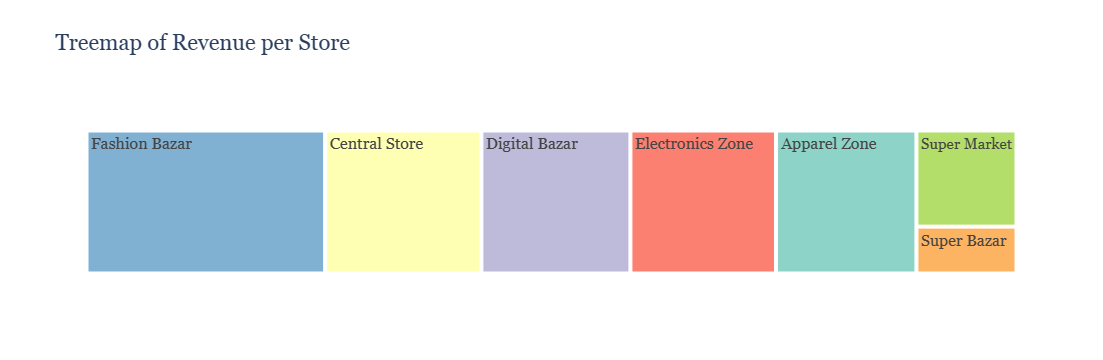

In [5]:
dataframe = pd.DataFrame({'StoreName': per_store_revenue.index, 'Revenue': per_store_revenue.values})

custom_colors = px.colors.qualitative.Set3  # You can choose any other color palette or define your own list of colors

fig = px.treemap(dataframe, path=['StoreName'], values='Revenue', title='Treemap of Revenue per Store',
                 color='StoreName', color_discrete_sequence=custom_colors)

fig.update_layout(
    font_family="Georgia",
    font_size=16
)

fig.show()

**Analysis**
* **Fashion Bazar** makes revenue 3,31,395, **high revenue** signifies strong **customer demand** and **effective sales strategies**, leading to **increased profitability** and **market competitiveness** as **Fashion Bazar** has
* **Central Store** makes revenue 2,16,957.7, this is the second highest rvenue holder that means its marketing statregies are quite healthy
* **Digital Bazar** makes revenue 2,06,934.4, this is the third highest revenue holder which means all the important factors are well mentained for **Digital Bazar**
* **Electronics Zone** makes revenue 2,02,176, **Negative reviews or feedback from customers** can **deter potential buyers and impact sales**
* **Apperal Zone** makes revenue 1,94,967, businesses need to invest in **targeted marketing efforts** to drive traffic to their online platforms and convert leads into sales 
* **Super Market** makes revenue 93,391, low revenue and ineffective marketing strategies can result in low visibility and limited customer reach
* **Super Bazar** makes revenue 45,542, **Super Bazar** has the **lowest revenue**. **Low revenue** may be a symptom of **poor product quality**, **pricing strategies**, or customer service 
*  Analyzing revenue trends helps **ecommerce businesses identify opportunities** for **optimization, investment, and strategic decision-making** 

### Analysis Scope

The analysis will focus on exploring the relationships between different **store attributes, sales performance, and customer behavior.
Descriptive statistics, visualizations (e.g., bar plots, pie charts, scatter plots), and correlation analyses will be employed to understand the dataset and draw actionable insights.**
Specific areas of interest include store segmentation, sales trends over time, the impact of location on sales, customer demographics, and the effectiveness of marketing strategies.

### Expected Outcomes

Gain insights into the performance of individual stores and store segments.
Identify factors contributing to **high or low sales and profitability.**
Understand customer preferences and behaviors to tailor marketing efforts and **improve customer satisfaction.
Provide recommendations for optimizing store operations, enhancing sales performance, and maximizing profitability.**

### Conclusion

In conclusion, the analysis of the provided retail dataset revealed valuable insights **into store performance, sales trends, and customer behavior.** By examining **key performance indicators (KPIs) such as total sales, average transaction value, and conversion rate**, we gained a comprehensive understanding of store profitability. The segmentation of stores by location, type, and tenure allowed for targeted strategies to optimize operations and maximize revenue. Additionally, exploring the impact of online presence on sales **highlighted the importance of e-commerce integration for modern retailers**. Leveraging data-driven insights, retailers can refine **marketing strategies, improve customer engagement, and enhance overall profitability in a competitive retail landscape.**





